<a href="https://colab.research.google.com/github/coordanalisis-sedatu/datavivi/blob/main/mapa_acciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#Borrar los datos del entorno
rm(list=ls())

In [28]:
# Librerías
if (!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse, srvyr, janitor,googledrive, openxlsx,showtext,sf)
font_add_google("Poppins", "pop")
showtext_auto()

In [29]:
  #Conectar a google drive
drive_auth(email = "coordanalisis.sedatu@gmail.com",cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=9d293ea922c14f2fb3961d8b2156d9c8&login_hint=coordanalisis.sedatu%40gmail.com&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWVhWVNIQnlDNGVOc1pjNEc1QTFnZV9RZmRoeDd4TnBZWTZ0NHJkWk1VemVaR3h1VGNtUV9FR0RNcDQ0endOQzFXa2RSZyIsInN0YXRlIjoiOWQyOTNlYTkyMmMxNGYyZmIzOTYxZDhiMjE1NmQ5YzgifQ==


In [30]:
#Carpeta de trabajo
carpeta<-as_id(drive_get("https://drive.google.com/drive/folders/10p-Z2li6q_bU_dcTJwLfWKuNP5NL89R1"))
#Mostrar archivos en carpeta de trabajo
archivos<-drive_ls(carpeta)
print(archivos)


# A dribble: 1 × 3
  name                                  id       drive_resource   
  <chr>                                 <drv_id> <list>           
1 Base para mapa 4to trim 2023 PNV.xlsx 10qFoAb… <named list [43]>


In [31]:
ids<-archivos$id[1]
ids

<drive_id[1]>
[1] 10qFoAb7rubFrx9jm_Ab2NaRNFRi0W3wi

In [32]:
leer_archivo <- function(id_archivo) {
  # Descarga el archivo a una ubicación local temporal
  archivo_local <- tempfile()
  drive_download(id_archivo, archivo_local)

  # Lee el archivo CSV desde la ubicación local
  datos <- readxl::read_xlsx(archivo_local)%>%
    janitor::clean_names()
  unlink(archivo_local)

  # Devuelve el dataframe
  return(datos)

}

In [40]:
df<-leer_archivo(ids)
df

File downloaded:

• Base para mapa 4to trim 2023 PNV.xlsx <id: 10qFoAb7rubFrx9jm_Ab2NaRNFRi0W3wi>

Saved locally as:

• /tmp/RtmpRjX9ev/file7e109131f6



no,entidad,infonavit,conavi,fovissste,shf,insus,total
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15,México,26474,14233,3073,6686,252,50718
19,Nuevo León,44418,0,752,3473,32,48675
7,Chiapas,13432,11661,1704,13576,235,40608
14,Jalisco,32680,1232,900,4946,206,39964
30,Veracruz de Ignacio de la Llave,12691,7501,2722,2577,459,25950
2,Baja California,18201,1918,348,2617,246,23330
6,Colima,21210,805,556,357,15,22943
28,Tamaulipas,19824,804,958,580,297,22463
11,Guanajuato,18936,1,1019,2356,133,22445


In [46]:
ent<-st_read("https://raw.githubusercontent.com/strotgen/mexico-leaflet/master/states.geojson")%>%
  #Renombrar Distrito Federal como Ciudad de México
mutate(state_name=case_when(state_name=="Distrito Federal" ~ "Ciudad de México",
TRUE ~ state_name))
ent


Reading layer `states' from data source 
  `https://raw.githubusercontent.com/strotgen/mexico-leaflet/master/states.geojson' 
  using driver `GeoJSON'
Simple feature collection with 32 features and 3 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -118.4 ymin: 14.5321 xmax: -86.72404 ymax: 32.71865
Geodetic CRS:  WGS 84


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

,id,state_code,state_name,geometry
,<chr>,<int>,<chr>,<MULTIPOLYGON [°]>
1,NA,9,Ciudad de México,MULTIPOLYGON (((-99.09052 1...
2,NA,12,Guerrero,MULTIPOLYGON (((-100.5388 1...
3,NA,15,México,MULTIPOLYGON (((-99.85919 2...
4,NA,17,Morelos,MULTIPOLYGON (((-99.06199 1...
5,NA,25,Sinaloa,MULTIPOLYGON (((-108.4705 2...
6,NA,2,Baja California,MULTIPOLYGON (((-115.2138 2...
7,NA,26,Sonora,MULTIPOLYGON (((-112.5544 2...
8,NA,3,Baja California Sur,MULTIPOLYGON (((-109.8005 2...
9,NA,32,Zacatecas,MULTIPOLYGON (((-101.6003 2...


In [47]:
ent<-ent%>%
  left_join(df,by=c("state_name"="entidad"))%>%
  mutate(total=total/1000)

ent

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

,id,state_code,state_name,no,infonavit,conavi,fovissste,shf,insus,total,geometry
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
1,NA,9,Ciudad de México,9,3177,655,2335,7682,40,13.889,MULTIPOLYGON (((-99.09052 1...
2,NA,12,Guerrero,12,1773,4216,1024,1576,329,8.918,MULTIPOLYGON (((-100.5388 1...
3,NA,15,México,15,26474,14233,3073,6686,252,50.718,MULTIPOLYGON (((-99.85919 2...
4,NA,17,Morelos,17,3318,1695,1442,1112,142,7.709,MULTIPOLYGON (((-99.06199 1...
5,NA,25,Sinaloa,25,8750,1130,1217,1775,316,13.188,MULTIPOLYGON (((-108.4705 2...
6,NA,2,Baja California,2,18201,1918,348,2617,246,23.330,MULTIPOLYGON (((-115.2138 2...
7,NA,26,Sonora,26,12109,2056,802,2822,420,18.209,MULTIPOLYGON (((-112.5544 2...
8,NA,3,Baja California Sur,3,2537,466,632,216,0,3.851,MULTIPOLYGON (((-109.8005 2...
9,NA,32,Zacatecas,32,2391,1,546,419,85,3.442,MULTIPOLYGON (((-101.6003 2...


In [48]:
custom_palette <- rev(c("#7e5f33","#a27b42","#bc955c","#caac80","#d9c4a4"))
# Create bins for the continuous variable 'acciones'
ent$acciones_cat <- cut(ent$total, breaks = 5)

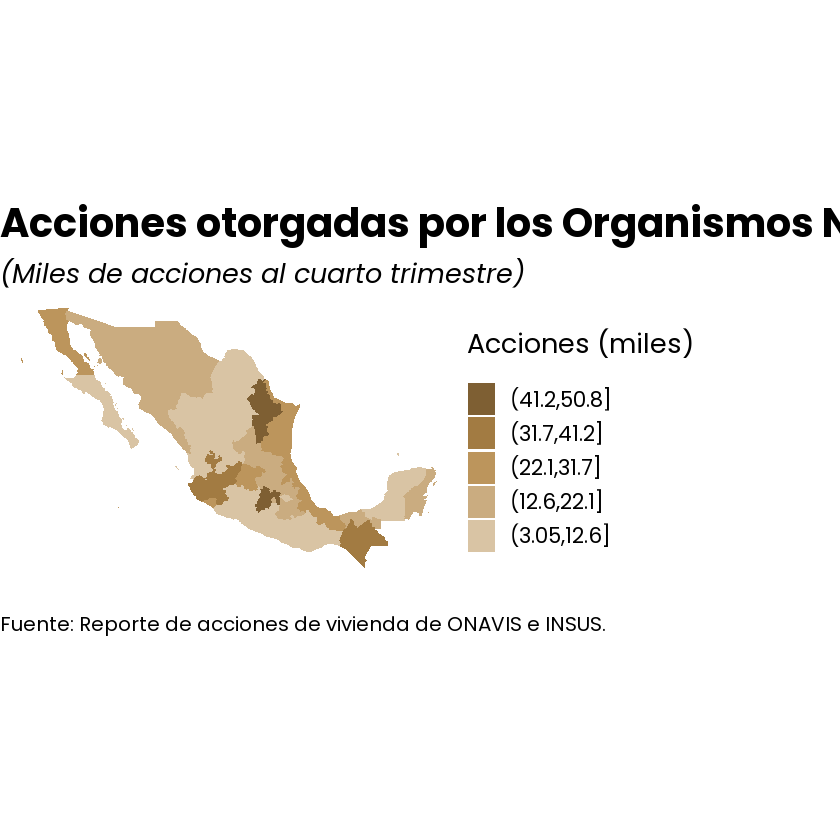

In [51]:
ent%>%
  ggplot() +
  # Capa con datos de los municipios
  geom_sf(data=ent,aes(fill = acciones_cat),
          colour = "#1C00ff00", size = 0.07) +
  # Agrega título, subtítulo y fuente
  labs(title = "Acciones otorgadas por los Organismos Nacionales de Vivienda, 2023",
       subtitle="(Miles de acciones al cuarto trimestre)",
       caption = "
Fuente: Reporte de acciones de vivienda de ONAVIS e INSUS.") +
  scale_fill_manual("Acciones (miles)",values = custom_palette)+
  guides(fill = guide_legend(reverse = TRUE)) +
    theme_void()+
  theme(plot.title = element_text(hjust = 0, size=30,face="bold"),
        plot.subtitle = element_text(hjust = 0, size=20, face="italic"),
        plot.caption = element_text(hjust = 0,size=15),
        legend.position="right",
        #Fuente y tamaño
        text=element_text("pop",
                          size=20))

#Salvar mapa

ggsave("mapa_acciones.png",height = 10,width = 20, units="in",dpi=100, bg='white')
